In [ ]:
#Import the necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, ComplementNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np




# **Load Dataset**



In [ ]:

#LoadtheIrisdataset
iris = load_iris()

In [ ]:
X = iris.data
y = iris.target

<ipython-input-10-6a5e4758eea2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined['target'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)


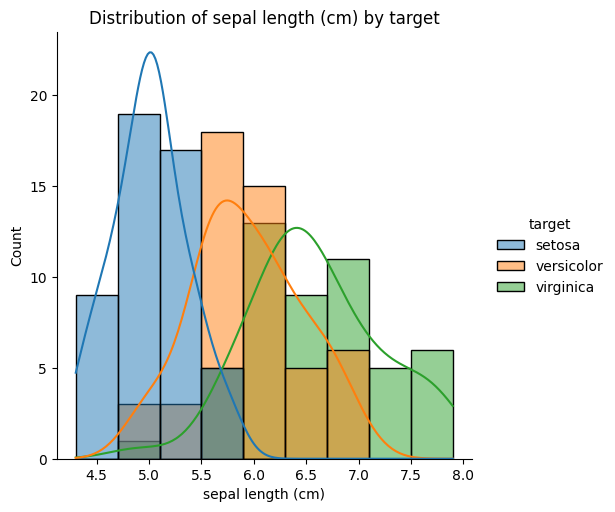

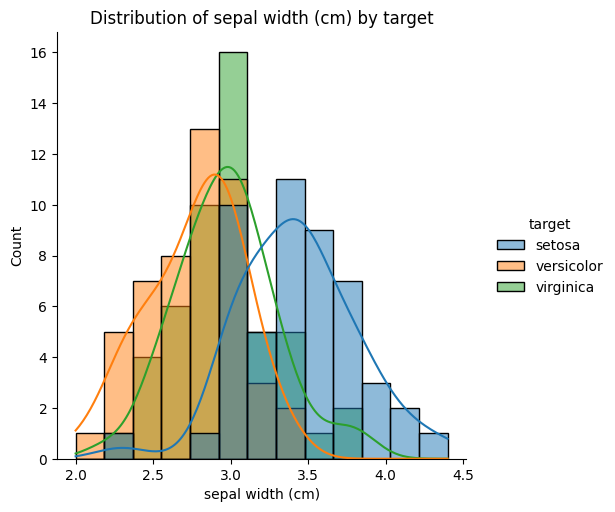

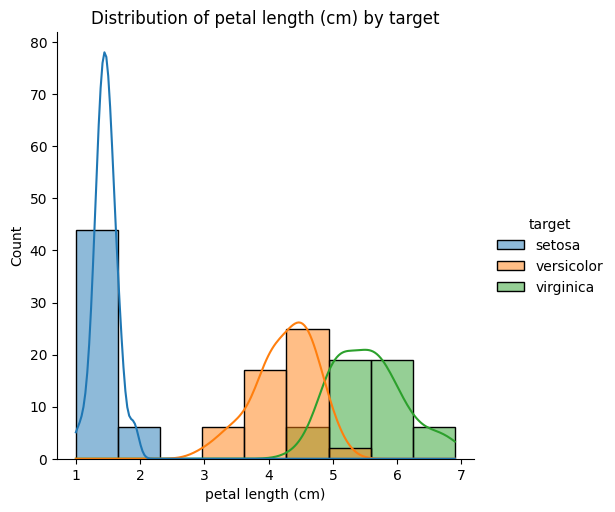

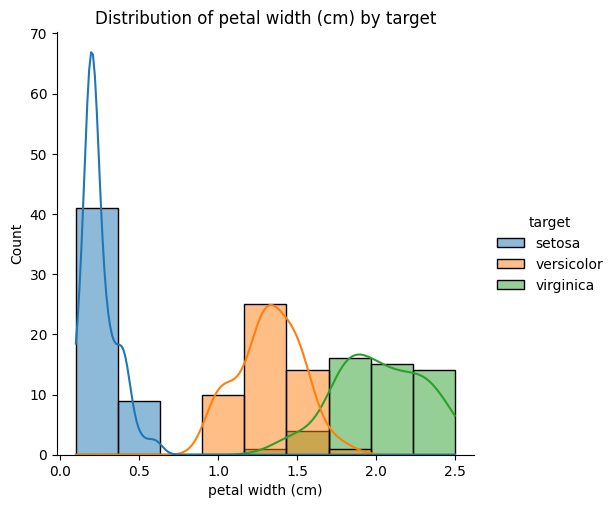

In [ ]:
# Combine X and y arrays
combined_data = np.concatenate((X, y.reshape(-1, 1)), axis=1)

# Create a DataFrame
df_combined = pd.DataFrame(combined_data, columns=iris.feature_names + ['target'])

# Replace target values with corresponding species names
df_combined['target'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)

# Plot the distributions based on y
for feature in df_combined.columns[:-1]:
    sns.displot(data=df_combined, x=feature, hue='target', kde=True)
    plt.title(f"Distribution of {feature} by target")
    plt.show()

# **Split Dataset into train-test sets**

In [ ]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Classification by Naive Bayes Algorithm**

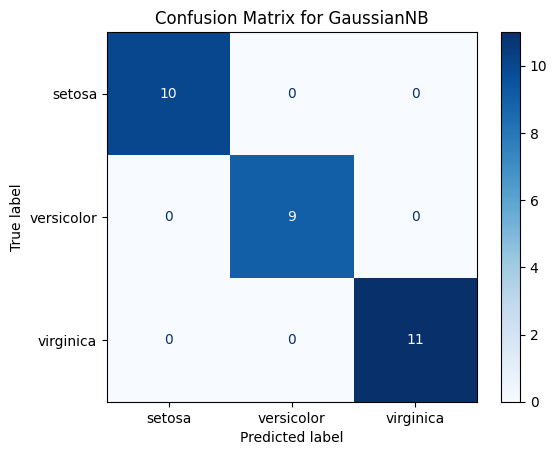

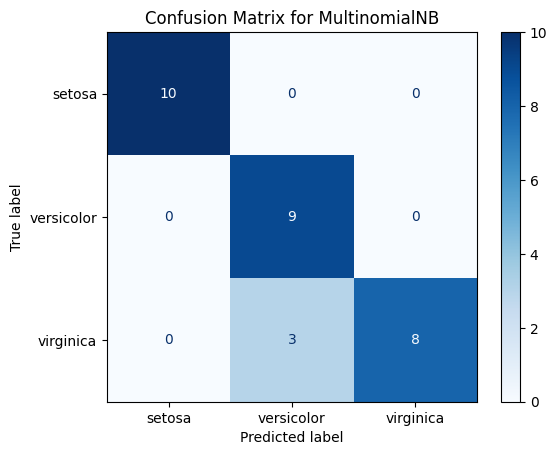

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


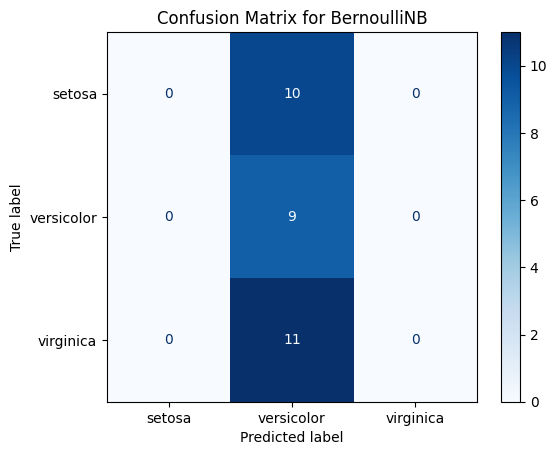

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


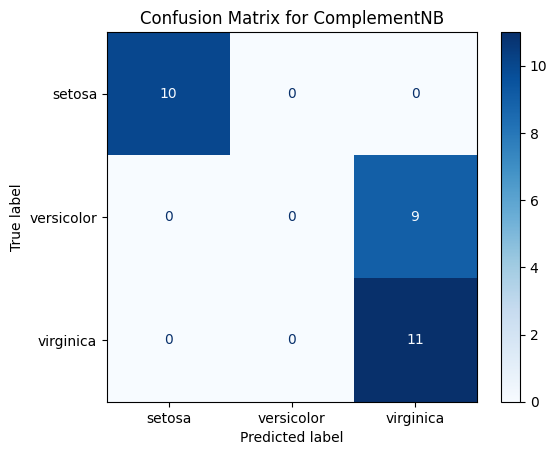

Evaluation Metrics for Naive Bayes Classifiers on Iris Dataset
      Classifier  Accuracy  Precision (macro avg)  Recall (macro avg)  \
0     GaussianNB       1.0               1.000000            1.000000   
1  MultinomialNB       0.9               0.916667            0.909091   
2    BernoulliNB       0.3               0.100000            0.333333   
3   ComplementNB       0.7               0.516667            0.666667   

   F1 Score (macro avg)  
0              1.000000  
1              0.899749  
2              0.153846  
3              0.569892  


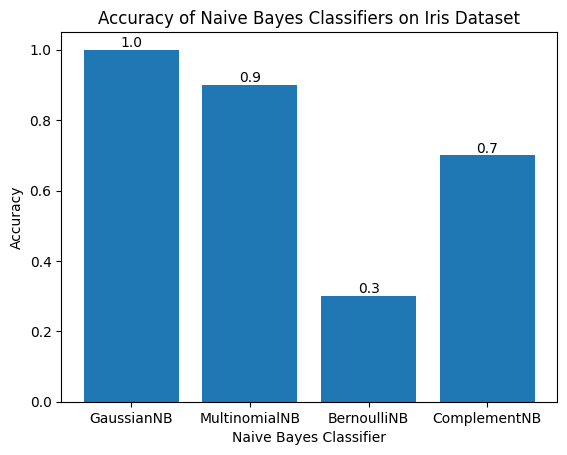

In [ ]:
# List of Naive Bayes classifiers
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB()
]

# Store evaluation results
results = []

# Train and evaluate each classifier
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, target_names=iris.target_names)

    # Store results in the list
    results.append({
        "Classifier": classifier.__class__.__name__,
        "Accuracy": accuracy,
        "Precision (macro avg)": report['macro avg']['precision'],
        "Recall (macro avg)": report['macro avg']['recall'],
        "F1 Score (macro avg)": report['macro avg']['f1-score']
    })

    # Display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {classifier.__class__.__name__}')
    plt.show()

# Create a DataFrame for the results
results_df = pd.DataFrame(results)
print("Evaluation Metrics for Naive Bayes Classifiers on Iris Dataset")
print(results_df)

# Plot the accuracies
labels = [result["Classifier"] for result in results]
accuracies = [result["Accuracy"] for result in results]
plt.bar(labels, accuracies)
plt.xlabel('Naive Bayes Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Naive Bayes Classifiers on Iris Dataset')

# Add the value on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v, str(round(v, 4)), ha='center', va='bottom')
plt.show()
